# Load Bộ dữ liệu


In [1]:
from keras.datasets.mnist import load_data
import numpy as np
from matplotlib import pyplot as plt
(X_train, y_train), (X_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
# Copy dữ liệu lúc cần dùng 
X_train_copy, y_train_copy, X_test_copy, y_test_copy = X_train.copy(), y_train.copy(), X_test.copy(), y_test.copy() 

# Chuẩn bị dữ liệu

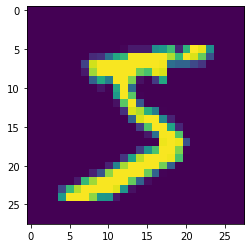

In [3]:
plt.imshow(X_train[0])

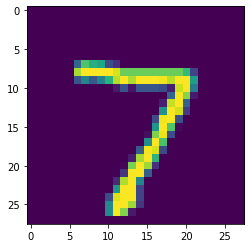

In [4]:
plt.imshow(X_test[0])

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
a = np.array([1, 2, 3, 1, 1, 2, 4, 5, 5])
list(set(a))

[1, 2, 3, 4, 5]

In [7]:
numbers = [2, 3, 5, 2, 11, 2, 7]
count_2 = numbers.count(2)

In [8]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [9]:
labels = list(set(y_train))

In [10]:
list_labels = dict()

for l in labels:
  list_labels[l] = list(y_train).count(l) 

In [11]:
list_labels[0]

5923

<function matplotlib.pyplot.show(*args, **kw)>

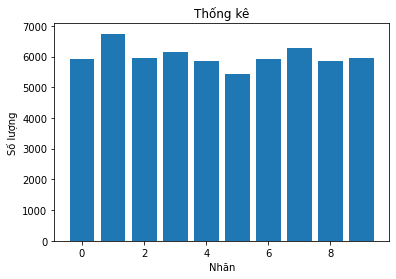

In [12]:
plt.bar(list_labels.keys(), list_labels.values())
plt.xlabel("Nhãn")
plt.ylabel("Số lượng") 
plt.title("Thống kê")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

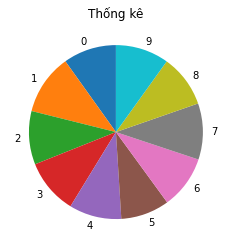

In [13]:
plt.pie(x = list_labels.values(), labels = list_labels.keys(),
        startangle = 90)
plt.title("Thống kê")
plt.show

In [14]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(-1,784)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [15]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [16]:
X_train[0].shape

(784,)

In [17]:
y_train[5]

2

In [18]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)

In [19]:
y_train.shape

(60000, 10)

In [20]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Xây dựng mạng Neural bằng Keras - Huấn luyện mô hình

In [21]:
from keras.models import Sequential
from keras.layers import Dense  

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model = Sequential()
model.add(Dense(784, input_shape=(784, )))
model.add(Dense(10, input_shape=(10, )))
optimizer = Adam(learning_rate=0.01)
loss1 = BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss1, metrics=['accuracy'])

In [23]:
%%time
model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 6s 5ms/step - loss: 5.2113 - accuracy: 0.1573
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 5.1898 - accuracy: 0.1580
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 5.1898 - accuracy: 0.1580
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 5.1898 - accuracy: 0.1580
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 5.1898 - accuracy: 0.1580
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 5.1898 - accuracy: 0.1580
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 5.1898 - accuracy: 0.1580
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 5.1898 - accuracy: 0.1580
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 5.1898 - accuracy: 0.1580
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 5.1898 - accuracy: 0.1580

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred.shape

(10000, 10)

In [27]:
y_pred_label = np.argmax(y_pred, axis=-1)
y_pred_label

array([7, 7, 7, ..., 7, 7, 6])

In [28]:
y_pred[50]

array([  -766.8692, -18618.338 ,   1456.8448, -26530.945 , -29296.094 ,
       -33065.594 ,   1720.7701,   1841.2129, -36417.24  , -47685.785 ],
      dtype=float32)

In [29]:
y_pred_label[50] == y_test[50]

False

In [30]:
y_pred_label[100], y_pred_label[1001], y_pred_label[4123]

(6, 6, 7)

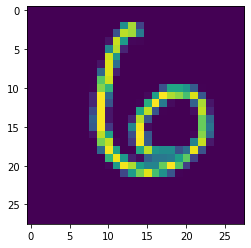

In [31]:
plt.imshow(X_test_copy[100])

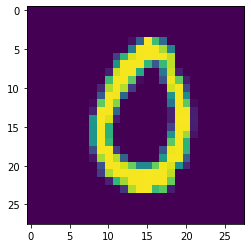

In [32]:
plt.imshow(X_test_copy[1001])

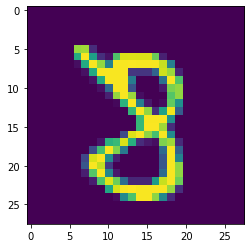

In [33]:
plt.imshow(X_test_copy[4123])

# Đánh giá mô hình

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_label)*100

15.8

# Lưu mô hình

In [35]:
model.save('/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/my_model.h5')

In [36]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/my_model.h5')

# BÀI TẬP 


## Bài tập 1

In [37]:
model_1 = Sequential()
model_1.add(Dense(784, input_shape=(784, ),activation='sigmoid'))
model_1.add(Dense(10, input_shape=(10, ), activation='sigmoid'))
optimizer = Adam(learning_rate=0.01)
loss1 = BinaryCrossentropy()
model_1.compile(optimizer=optimizer, loss=loss1, metrics=['accuracy'])
model_1.fit(X_train, y_train, batch_size=128, epochs=10)

y_pred_1 = model_1.predict(X_test)
y_pred_label_1 = np.argmax(y_pred_1, axis=-1)
print("")
print("")
print("Kết quả: ")
accuracy_score(y_test, y_pred_label_1)*100

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1255 - accuracy: 0.8007
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1020 - accuracy: 0.8378
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0988 - accuracy: 0.8406
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0917 - accuracy: 0.8553
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0875 - accuracy: 0.8600
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0882 - accuracy: 0.8593
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0848 - accuracy: 0.8675
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0853 - accuracy: 0.8665
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0818 - accuracy: 0.8723
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0784 - accuracy: 0.8776

87.57000000000001

## Bài tập 2

In [38]:
model_2 = Sequential()
model_2.add(Dense(784, input_shape=(784, ),activation='relu'))
model_2.add(Dense(10, input_shape=(10, ), activation='sigmoid'))
optimizer = Adam(learning_rate=0.01)
loss1 = BinaryCrossentropy()
model_2.compile(optimizer=optimizer, loss=loss1, metrics=['accuracy'])
model_2.fit(X_train, y_train, batch_size=128, epochs=10)

y_pred_2 = model_2.predict(X_test)
y_pred_label_2 = np.argmax(y_pred_2, axis=-1)
print("")
print("")
print("Kết quả: ")
accuracy_score(y_test, y_pred_label_2)*100

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 3.5888 - accuracy: 0.8818
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0447 - accuracy: 0.9412
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0340 - accuracy: 0.9541
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0321 - accuracy: 0.9571
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.9570
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0357 - accuracy: 0.9532
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0364 - accuracy: 0.9525
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0446 - accuracy: 0.9440
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0544 - accuracy: 0.9295
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0647 - accuracy: 0.9112

88.53

## Bài tập 3

In [39]:
# Chuẩn hóa dữ liệu 

X_train_new = X_train/255.0
X_test_new = X_test/255.0


In [40]:
# Sử dụng model_2 cho dữ liệu đã chuẩn hóa 
model_2_new = Sequential()
model_2_new.add(Dense(784, input_shape=(784, ),activation='relu'))
model_2_new.add(Dense(10, input_shape=(10, ), activation='sigmoid'))
optimizer = Adam(learning_rate=0.01)
loss1 = BinaryCrossentropy()
model_2_new.compile(optimizer=optimizer, loss=loss1, metrics=['accuracy'])
model_2_new.fit(X_train_new, y_train, batch_size=128, epochs=10)

y_pred_2_new = model_2_new.predict(X_test_new)
y_pred_label_2_new = np.argmax(y_pred_2_new, axis=-1)
print("")
print("")
print("Kết quả: ")
accuracy_score(y_test, y_pred_label_2_new)*100


Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0426 - accuracy: 0.9367
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0194 - accuracy: 0.9736
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0152 - accuracy: 0.9801
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0122 - accuracy: 0.9856
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0112 - accuracy: 0.9870
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0101 - accuracy: 0.9885
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0080 - accuracy: 0.9910
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0077 - accuracy: 0.9922
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0070 - accuracy: 0.9934
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0071 - accuracy: 0.9932

97.19

## Bài tập 4

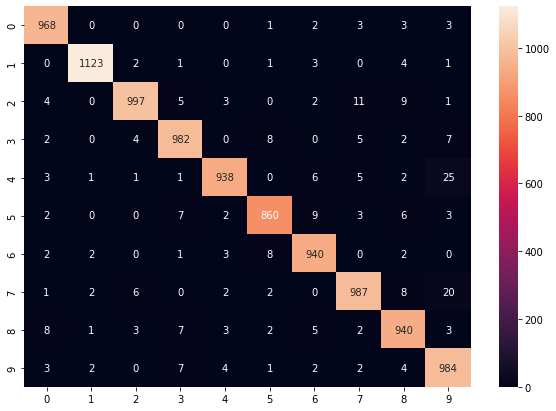

In [41]:
# Ma trận nhầm lẫn cho model ở Bài tập 3
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_label_2_new)

df_cm = pd.DataFrame(cm, index=[i for i in range(0,10)], columns=[i
for i in range(0,10)])
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, fmt='.5g')

# BÀI TẬP MỞ RỘNG

## Bài tập 5


In [42]:
from keras.datasets.cifar10 import load_data
(X_train_CIFAR10, y_train_CIFAR10), (X_test_CIFAR10, y_test_CIFAR10) = load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [43]:
X_train_CIFAR10 = X_train_CIFAR10.reshape(50000, 32*32*3)
X_test_CIFAR10 = X_test_CIFAR10.reshape(10000, 32*32*3)

In [44]:
y_train_CIFAR10 = y_train_CIFAR10.reshape(50000,)
y_test_CIFAR10 = y_test_CIFAR10.reshape(10000,)
y_train_CIFAR10 = to_categorical(y_train_CIFAR10, num_classes=10)

In [46]:
from keras.layers import Dropout
model_CIFAR10 = Sequential()
model_CIFAR10.add(Dense(3072, input_shape=(X_train_CIFAR10.shape[1],), activation='sigmoid'))
model_CIFAR10.add(Dense(10, input_shape=(10, ), activation='sigmoid'))
optimizer = Adam(learning_rate=0.01)
loss1 = BinaryCrossentropy()
model_CIFAR10.compile(optimizer=optimizer, loss=loss1, metrics=['accuracy'])
model_CIFAR10.fit(X_train_CIFAR10, y_train_CIFAR10, batch_size=64, epochs=10)

y_pred_CIFAR10 = model_CIFAR10.predict(X_test_CIFAR10)
y_pred_label_CIFAR10 = np.argmax(y_pred_CIFAR10, axis=-1)
print("")
print("")
print("Kết quả: ")
accuracy_score(y_test_CIFAR10, y_pred_label_CIFAR10)*100


Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 1.5414 - accuracy: 0.0998
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.5425 - accuracy: 0.0997
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5425 - accuracy: 0.1003
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5425 - accuracy: 0.0999
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5425 - accuracy: 0.0994
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5425 - accuracy: 0.1000
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5425 - accuracy: 0.0996
Epoch 8/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5425 - accuracy: 0.1003
Epoch 9/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5425 - accuracy: 0.1000
Epoch 10/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5425 - accuracy: 0.1001

10.0

## Bài tập 6

In [52]:
model_3 = Sequential()

model_3.add(Dense(784, input_shape=(784, ),activation='relu'))
model_3.add(Dense(784, input_shape=(784, ),activation='relu'))
model_3.add(Dense(784, input_shape=(784, ),activation='relu'))
model_3.add(Dense(10, input_shape=(10, ), activation='sigmoid'))
optimizer = Adam(learning_rate=0.002)
model_CIFAR10.add(Dropout(0.02))
loss1 = BinaryCrossentropy()
model_3.compile(optimizer=optimizer, loss=loss1, metrics=['accuracy'])
model_3.fit(X_train, y_train, batch_size=64, epochs=20)

y_pred_3 = model_3.predict(X_test)
y_pred_label_3 = np.argmax(y_pred_3, axis=-1)
print("")
print("")
print("Kết quả: ")
accuracy_score(y_test, y_pred_label_3)*100

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.3090 - accuracy: 0.9119
Epoch 2/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0293 - accuracy: 0.9541
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0229 - accuracy: 0.9649
Epoch 4/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0199 - accuracy: 0.9704
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0183 - accuracy: 0.9715
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0181 - accuracy: 0.9726
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0187 - accuracy: 0.9737
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0165 - accuracy: 0.9766
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0163 - accuracy: 0.9777
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0149 - accuracy: 0.9791

97.38